In [1]:
import os 
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [33]:
#import the data 
# os.chdir("./data")

def read_data(file_name):
    labels = []
    titles = []
    
    with open(file_name, 'r') as f:
        for line in f:
            if 'BillID,' in line:
                 pass
            elif '"' in line:
                split_1 = line.split('"')
                label = int(split_1[-1].lstrip(",").rstrip("\n"))
                
                print (label)
#                     title = title.replace(",", "").replace(".", "").lower() #here I deleted "," from the titles.
#                 titles.append(title)
            else:
                pass

            

# train_titles_raw, train_labels_raw = read_data("congress_train.csv")
# val_titles_raw, val_labels_raw = read_data("congress_val.csv")
test_titles_raw, test_labels_raw = read_data("congress_test.csv")

114-HR-435,435,"To direct the Secretary of the Interior to sell certain Federal lands in Arizona, Colorado, Idaho, Montana, Nebraska, Nevada, New Mexico, Oregon, Utah, and Wyoming, previously identified as suitable for disposal, and for other purposes.",21



TypeError: 'NoneType' object is not iterable

In [3]:
#check the data length 

print (len(train_titles_raw), len(train_labels_raw))
print (len(val_titles_raw), len(val_labels_raw))
print (len(test_titles_raw), len(test_labels_raw))

274482 274482
69649 69649
37733 37733


In [4]:
#setting up_data
def setting_data(text_lst,maxlen, max_words):
    maxlen = maxlen
    max_words = max_words

    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(text_lst)
    sequences = tokenizer.texts_to_sequences(text_lst)

    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))

    data = pad_sequences(sequences, maxlen=maxlen)

    print('Shape of data tensor:', data.shape)
    return (data)

In [5]:
#preprocessing train data 
x_train = setting_data(train_titles_raw, 
                       maxlen = 100,
                       max_words = 10000)

y_train = to_categorical(train_labels_raw)

#preprocessing validation data 
x_val = setting_data(val_titles_raw, 
                     maxlen = 100, 
                     max_words = 10000)

y_val = to_categorical(val_labels_raw)

#preprocessing test data 
x_test = setting_data(test_titles_raw, 
                      maxlen = 100,
                      max_words = 10000)

y_test = to_categorical(test_labels_raw)

Found 42197 unique tokens.
Shape of data tensor: (274482, 100)
Found 24985 unique tokens.
Shape of data tensor: (69649, 100)
Found 19565 unique tokens.
Shape of data tensor: (37733, 100)


In [6]:
len(y_train[0])

24

### Estimate a basic feed-forward network

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

maxlen = 100

basic_model = Sequential()

# output dim = 8
basic_model.add(Embedding(10000, 8, input_length = maxlen))
basic_model.add(Flatten())
basic_model.add(Dense(24, activation='softmax'))

basic_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
basic_model.summary()

history = basic_model.fit(x_train, y_train, epochs= 10, batch_size= 2048,
                         validation_data = (x_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                19224     
Total params: 99,224
Trainable params: 99,224
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 274482 samples, validate on 69649 samples
Epoch 1/10
274482/274482 [==============================] - 2s 8us/step - loss: 2.7604 - acc: 0.1802 - val_loss: 2.7471 - val_acc: 0.1672
Epoch 2/10
274482/274482 [==============================] - 1s 4us/step - loss: 2.2469 - acc:

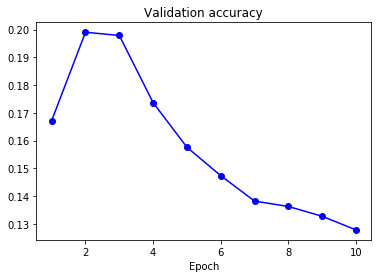

<Figure size 432x288 with 0 Axes>

In [8]:
basic_val_acc = history.history['val_acc']
basic_val_loss = history.history['val_loss']

epochs = range(1, len(basic_val_acc) + 1)

plt.plot(epochs, basic_val_acc, 'b', marker='o', label='Validation acc')
plt.title('Validation accuracy')
plt.xlabel("Epoch")
plt.figure()
plt.show()

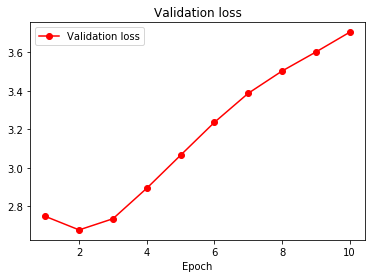

In [9]:
plt.clf()
plt.plot(epochs, basic_val_loss, 'r',marker = "o", label='Validation loss')
plt.title('Validation loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Estimate a recurrent neural network (RNN) with a layer_simple_rnn

In [10]:
from keras.layers import SimpleRNN

maxlen = 100

simple_rnn = Sequential()
simple_rnn.add(Embedding(10000, 8, input_length = maxlen))
simple_rnn.add(SimpleRNN(8))
simple_rnn.add(Dense(24, activation='softmax'))

simple_rnn.compile(optimizer='rmsprop', 
                   loss='categorical_crossentropy', 
                   metrics=['acc'])
simple_rnn.summary()

rnn_history = simple_rnn.fit(x_train, y_train, epochs= 10, batch_size= 2048,
                         validation_data = (x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                216       
Total params: 80,352
Trainable params: 80,352
Non-trainable params: 0
_________________________________________________________________
Train on 274482 samples, validate on 69649 samples
Epoch 1/10
274482/274482 [==============================] - 12s 43us/step - loss: 2.9288 - acc: 0.1843 - val_loss: 2.9866 - val_acc: 0.1340
Epoch 2/10
274482/274482 [==============================] - 11s 41us/step - loss: 2.6028 - acc: 0.2317 - val_loss: 3.0009 - val_acc: 0.1270
Epoch 3/10
274482/274482 [==============================] - 11s 41us/st

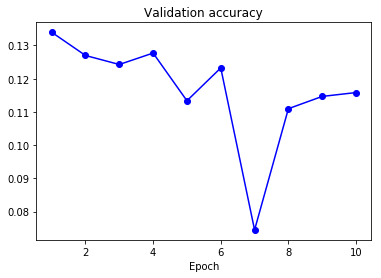

<Figure size 432x288 with 0 Axes>

In [11]:
rnn_val_acc = rnn_history.history['val_acc']
rnn_val_loss = rnn_history.history['val_loss']

epochs = range(1, len(rnn_val_acc) + 1)

plt.plot(epochs, rnn_val_acc, 'b', marker='o', label='Validation acc')
plt.title('Validation accuracy')
plt.xlabel("Epoch")
plt.figure()
plt.show()

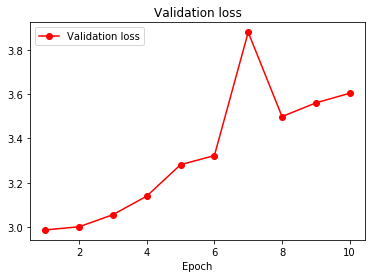

In [12]:
plt.clf()
plt.plot(epochs, rnn_val_loss, 'r',marker = "o", label='Validation loss')
plt.title('Validation loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Estimate an RNN with an LSTM layer

In [13]:
from keras.layers import LSTM

maxlen = 100

rnn_lstm = Sequential()
rnn_lstm.add(Embedding(10000, 8, input_length = maxlen))
rnn_lstm.add(LSTM(8))
rnn_lstm.add(Dense(24, activation='softmax'))

rnn_lstm.compile(optimizer='rmsprop', 
                   loss='categorical_crossentropy', 
                   metrics=['acc'])
rnn_lstm.summary()

lstm_history = rnn_lstm.fit(x_train, y_train, epochs= 10, batch_size= 2048,
                         validation_data = (x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                216       
Total params: 80,760
Trainable params: 80,760
Non-trainable params: 0
_________________________________________________________________
Train on 274482 samples, validate on 69649 samples
Epoch 1/10
274482/274482 [==============================] - 28s 100us/step - loss: 2.9621 - acc: 0.0933 - val_loss: 2.9551 - val_acc: 0.1319
Epoch 2/10
274482/274482 [==============================] - 27s 97us/step - loss: 2.7003 - acc: 0.1533 - val_loss: 2.9414 - val_acc: 0.1318
Epoch 3/10
274482/274482 [==============================] - 27s 97us/s

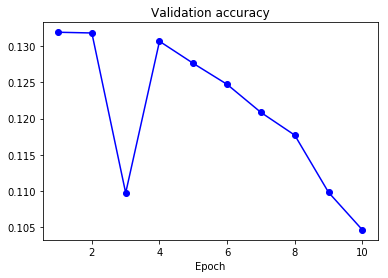

<Figure size 432x288 with 0 Axes>

In [14]:
lstm_val_acc = lstm_history.history['val_acc']
lstm_val_loss = lstm_history.history['val_loss']

epochs = range(1, len(lstm_val_acc) + 1)

plt.plot(epochs, lstm_val_acc, 'b', marker='o', label='Validation acc')
plt.title('Validation accuracy')
plt.xlabel("Epoch")
plt.figure()
plt.show()

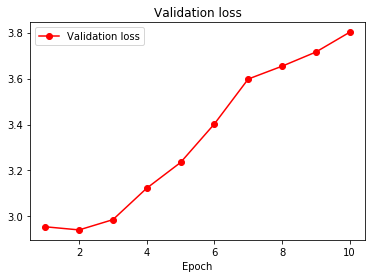

In [15]:
plt.clf()
plt.plot(epochs, lstm_val_loss, 'r',marker = "o", label='Validation loss')
plt.title('Validation loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Estimate an RNN with a GRU layer

In [ ]:
from keras.layers import GRU

maxlen = 100

gru = Sequential()
gru.add(Embedding(10000, 8, input_length = maxlen))
gru.add(GRU(8))
gru.add(Dense(24, activation='softmax'))

gru.compile(optimizer='rmsprop', 
                   loss='categorical_crossentropy', 
                   metrics=['acc'])
gru.summary()

gru_history = gru.fit(x_train, y_train, epochs= 10, batch_size= 2048,
                         validation_data = (x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 408       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                216       
Total params: 80,624
Trainable params: 80,624
Non-trainable params: 0
_________________________________________________________________
Train on 274482 samples, validate on 69649 samples
Epoch 1/10
274482/274482 [==============================] - 23s 85us/step - loss: 2.9987 - acc: 0.0991 - val_loss: 2.8981 - val_acc: 0.1323
Epoch 2/10
274482/274482 [==============================] - 22s 82us/step - loss: 2.7175 - acc: 0.1599 - val_loss: 2.9497 - val_acc: 0.1247
Epoch 3/10
274482/274482 [==============================] - 22s 82us/st

In [ ]:
gru_val_acc = gru_history.history['val_acc']
gru_val_loss = gru_history.history['val_loss']

epochs = range(1, len(gru_val_acc) + 1)

plt.plot(epochs, gru_val_acc, 'b', marker='o', label='Validation acc')
plt.title('Validation accuracy')
plt.xlabel("Epoch")
plt.figure()
plt.show()

In [ ]:
plt.clf()
plt.plot(epochs, gru_val_loss, 'r',marker = "o", label='Validation loss')
plt.title('Validation loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
import pickle

history_lst = [history, rnn_history, lstm_history, gru_history]
pickle.dump(history_lst, open("history_lst_1.p", "wb"))